In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [5]:
#read data with pandas library

df = pd.read_excel("dataset.xlsx",index_col=0)


In [7]:
df.head(3) #First 3 samples of the our dataset:

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
Name,,,,,,,,,,,,,,,,
Alarmio-master,22.0,17.0,3.0,169.0,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
AndroidAsyncHTTP-master,11.0,20.0,14.0,494.0,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
android-pdf-viewer-master,2.0,1.0,0.0,4.0,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


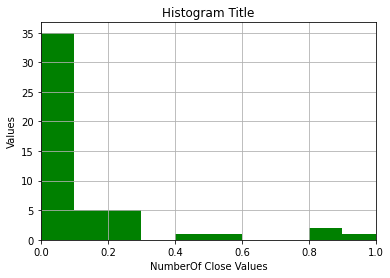

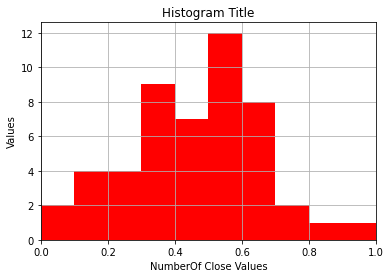

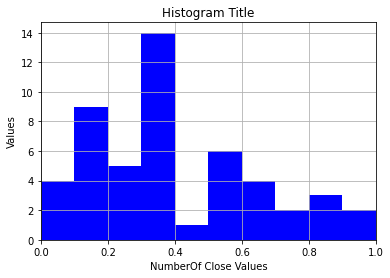

In [9]:
#show the distribution of 3 metrics
df = df.head(50)

def plotHist(columnName,colorName):

    df.hist(column=columnName, color=colorName)
    plt.xlabel("NumberOf Close Values")
    plt.ylabel("Values")

    ## bişeyler yaparsın
    
    maxV = df[columnName].max()
    minV = df[columnName].min()
    plt.xlim(minV,maxV)

    plt.title("Histogram Title")
    plt.show()

plotHist("CS","green")
plotHist("CBO","red")
plotHist("LOC","blue")

In [11]:
#Min max scaler for all data

data = df.copy()

numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
data = data.select_dtypes(include=numerics)

for d in data:
    col = data[[d]]
    df[[d]] = MinMaxScaler().fit_transform(col)

df

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
Name,,,,,,,,,,,,,,,,
Alarmio-master,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
AndroidAsyncHTTP-master,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
android-pdf-viewer-master,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
android-permission-handler-master,0.009091,0.003268,0.023256,0.0030,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
Android-WhatsApp-master,0.000000,0.019608,0.000000,0.1265,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032
android-youtubeExtractor-master,0.036364,0.058824,0.162791,0.0500,0.191919,0.254098,0.247059,0.514500,0.279926,0.755345,0.176454,0.532671,0.779704,0.427866,0.745788,0.845116
androidtv-sample-inputs-master,0.136364,0.009804,0.000000,0.0775,0.151515,0.081967,0.298861,0.681968,0.338284,0.573309,0.692028,0.541490,0.664970,0.528409,0.524693,0.725994
BirthdayBuddy-master,0.009091,0.000000,0.000000,0.0345,0.050505,0.016393,0.000000,0.000000,0.000000,1.000000,0.103223,0.000000,0.000000,0.000000,0.000000,0.000000
dex2jar,0.309091,1.000000,1.000000,1.0000,0.510101,0.139344,0.618665,1.000000,0.332216,0.716229,0.337156,0.743482,0.633001,0.391777,0.826300,0.692359


# Part1 (Statistical Correlation Analysis)

In [13]:
#Show the correlation matrix of all metrics

corr = df.corr(method="spearman")

corr


,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [15]:
#P values of Spearman Correlation Table
from scipy.stats import spearmanr

pd.DataFrame(data=spearmanr(df)[1].round(4))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
1,0.0000,0.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
2,0.0000,0.0000,0.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
4,0.0076,0.0486,0.0058,0.0000,0.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
5,0.3558,0.0364,0.8548,0.1756,0.9264,0.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
6,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,0.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
7,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,0.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
8,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,0.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
9,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,0.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


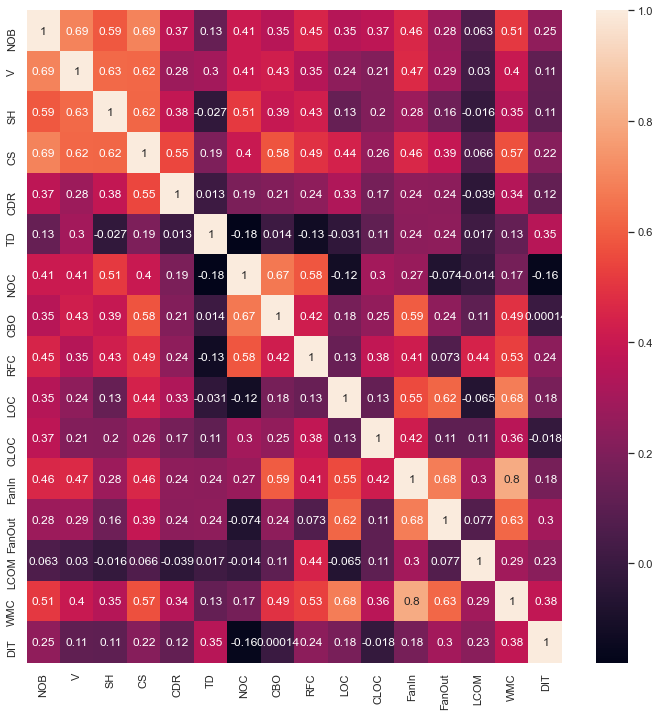

In [17]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
sns.set(font_scale=1)
plt.figure(figsize=(12,12))

heatMap = sns.heatmap(corr,annot = True)

plt.show()


In [19]:
#Correlation between Internal Metrics & TD

corr_int_td = data.corr(method="spearman").loc["NOB":"CS","CDR":"TD"]

corr_int_td

,CDR,TD
NOB,0.373251,0.133383
V,0.280358,0.296757
SH,0.384657,-0.026546
CS,0.548113,0.194611


In [21]:
#Correlation between External Metrics & TD

cor_ext_td = data.corr(method="spearman").loc["NOC":"DIT","CDR" : "TD"]

cor_ext_td


,CDR,TD
NOC,0.192707,-0.179659
CBO,0.212007,0.013652
RFC,0.240992,-0.126364
LOC,0.328527,-0.031098
CLOC,0.171773,0.114297
FanIn,0.243709,0.239077
FanOut,0.237237,0.240135
LCOM,-0.038683,0.017159
WMC,0.343628,0.127638
DIT,0.123330,0.352010


# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid

random_state_fixed=53

#This function plots graphs to improve visual confirmation
def plotGraph(y_test,y_pred,regressorName):

#Plot the Scatter Graph to see results better
  plt.scatter(y_test,y_test,color="red",label="original Values")
  plt.scatter(y_test,y_pred,color="blue",label="predicted Values")
  plt.title(regressorName)
  plt.legend()
  plt.show()

  print("Root Mean Squared Error : {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
  print("R-Squared Value : {}".format(r2_score(y_test,y_pred)))




#Linear Regressor is one of the best choice for the data that is correlated linearly:
def linearRegression(X_train,y_train,X_test,y_test,regressionName):
  # Create the regressor: reg_all

  regressor = LinearRegression()

  regressor.fit(X_train,y_train)   
  y_pred = regressor.predict(X_test)
  
  ## Plot Output
  
  plotGraph(y_test,y_pred,regressionName)


# #SVR is also one of the most common regressor that used for regression predictions
def svrRegression(X_train,y_train,X_test,y_test,regressionName):


  def regressorManager(kernelName):
    regressor = SVR(kernel =kernelName)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    plotGraph(y_test,y_pred,regressionName)


  regressorManager("rbf")
  regressorManager("linear")

 
def decisionTreeRegression(X_train,y_train,X_test,y_test,regressionName):
   
   # create regressor

  regressor = DecisionTreeRegressor(random_state = random_state_fixed)
  regressor.fit(X_train,y_train)
  y_pred  = regressor.predict(X_test)

   ## draw a graph

  plotGraph(y_test,y_pred,regressionName)




def randomDecTreeRegression(X_train,y_train,X_test,y_test,regressionName):
   # creating Regressor
  regressor = RandomForestRegressor(random_state = random_state_fixed)
  regressor.fit(X_train,y_train)
    
   # Injecting test dataset and getting prediction result
  y_pred = regressor.predict(X_test)

   # show result on graph
   
  plotGraph(y_test,y_pred,regressionName)

# #Multi-layer Perceptron regressor: 'This model optimizes the squared-loss using LBFGS or stochastic gradient descent.'
def mlpRegressor(X_train,y_train,X_test,y_test,regressionName):
   
   ## creating regressor and injecting train dataset
  regressor = MLPRegressor(random_state = random_state_fixed)
  regressor.fit(X_train,y_train)

   ## Injecting Test Dataset and getting result
  y_pred = regressor.predict(X_test)
   

  plotGraph(y_test,y_pred,regressionName)
   ## Showing this result on graph




In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [ ]:
#split data into train and test data

x = df.iloc[:,7:]
y_CDR = df["CDR"]
y_TD = df["TD"]

X_train_CDR,X_test_CDR,y_train_CDR,y_test_CDR = train_test_split(x,y_CDR,test_size=0.3,train_size=0.7,random_state=random_state_fixed)



X_train_TD,X_test_TD,y_train_TD,y_test_TD = train_test_split(x,y_TD,test_size=0.3,train_size=0.7,random_state=random_state_fixed)


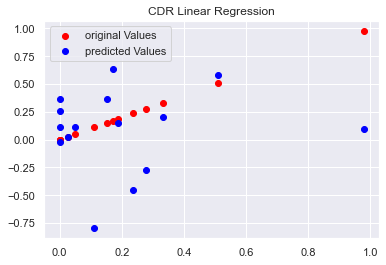

Root Mean Squared Error : 0.4373564766984459
R-Squared Value : -2.0091415912957933


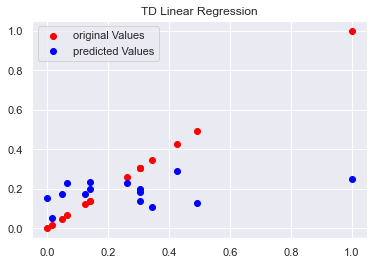

Root Mean Squared Error : 0.2451858519572477
R-Squared Value : -0.003633279100095921


In [42]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(X_train_CDR,y_train_CDR,X_test_CDR,y_test_CDR,"CDR Linear Regression")
linearRegression(X_train_TD,y_train_TD,X_test_TD,y_test_TD,"TD Linear Regression")

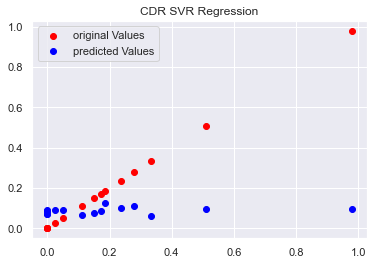

Root Mean Squared Error : 0.27368720851888134
R-Squared Value : -0.17836680254422155


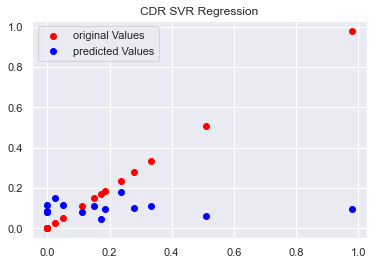

Root Mean Squared Error : 0.2764895816641747
R-Squared Value : -0.20262171584974764


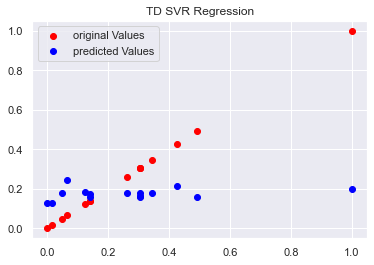

Root Mean Squared Error : 0.25485490521089144
R-Squared Value : -0.08435187470061245


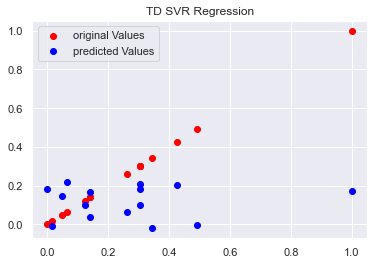

Root Mean Squared Error : 0.2941805346215553
R-Squared Value : -0.4448145501740104


In [26]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )

svrRegression(X_train_CDR,y_train_CDR,X_test_CDR,y_test_CDR,"CDR SVR Regression")
svrRegression(X_train_TD,y_train_TD,X_test_TD,y_test_TD,"TD SVR Regression")


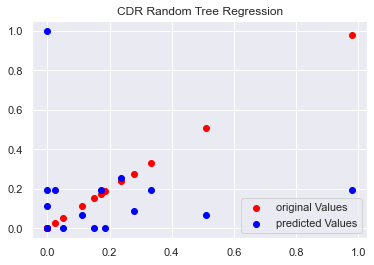

Root Mean Squared Error : 0.3665497768437371
R-Squared Value : -1.113671140724148


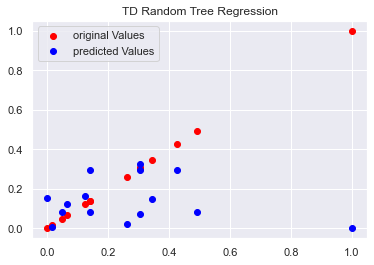

Root Mean Squared Error : 0.3045902815766182
R-Squared Value : -0.5488748417200913


In [27]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

decisionTreeRegression(X_train_CDR,y_train_CDR,X_test_CDR,y_test_CDR,"CDR Random Tree Regression")
decisionTreeRegression(X_train_TD,y_train_TD,X_test_TD,y_test_TD,"TD Random Tree Regression")


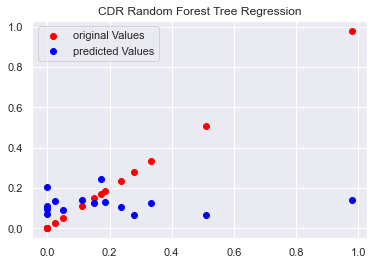

Root Mean Squared Error : 0.27074277711899514
R-Squared Value : -0.15314855077633127


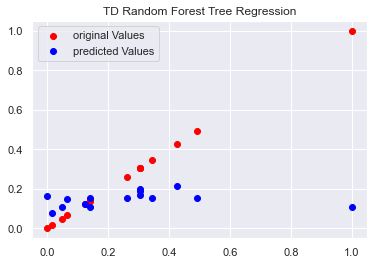

Root Mean Squared Error : 0.269108986472723
R-Squared Value : -0.20903992392593973


In [28]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

randomDecTreeRegression(X_train_CDR,y_train_CDR,X_test_CDR,y_test_CDR,"CDR Random Forest Tree Regression")
randomDecTreeRegression(X_train_TD,y_train_TD,X_test_TD,y_test_TD,"TD Random Forest Tree Regression")

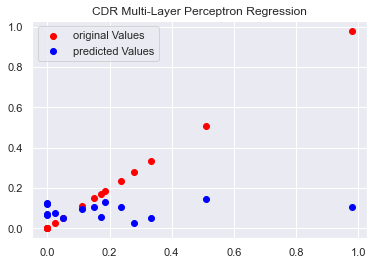

Root Mean Squared Error : 0.27240863512964875
R-Squared Value : -0.16738266326157558


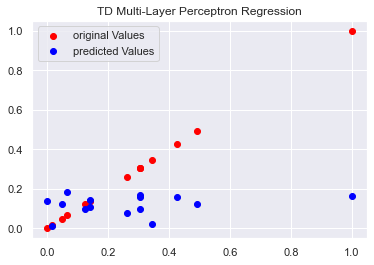

Root Mean Squared Error : 0.2786437001065499
R-Squared Value : -0.29623187806021534


In [29]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )

mlpRegressor(X_train_CDR,y_train_CDR,X_test_CDR,y_test_CDR,"CDR Multi-Layer Perceptron Regression")
mlpRegressor(X_train_TD,y_train_TD,X_test_TD,y_test_TD,"TD Multi-Layer Perceptron Regression")


In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [30]:
#split data into train and test data

x = df.iloc[:, 1:5].values
y_CDR = df["CDR"].values
y_TD = df["TD"].values

X_train_CDR,X_test_CDR,y_train_CDR,y_test_CDR = train_test_split(x,y_CDR,test_size=0.3,train_size=0.7,random_state=random_state_fixed)


X_train_TD,X_test_TD,y_train_TD,y_test_TD = train_test_split(x,y_TD,test_size=0.3,train_size=0.7,random_state=random_state_fixed)

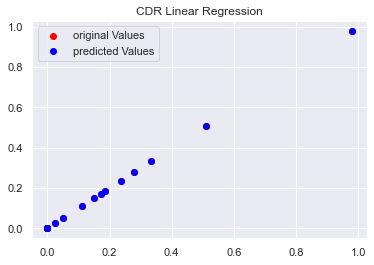

Root Mean Squared Error : 8.009357752173231e-17
R-Squared Value : 1.0


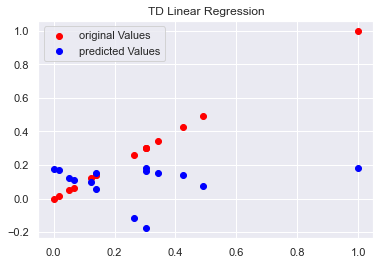

Root Mean Squared Error : 0.3102156164799942
R-Squared Value : -0.6066140266928803


In [31]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(X_train_CDR,y_train_CDR,X_test_CDR,y_test_CDR,"CDR Linear Regression")
linearRegression(X_train_TD,y_train_TD,X_test_TD,y_test_TD,"TD Linear Regression")


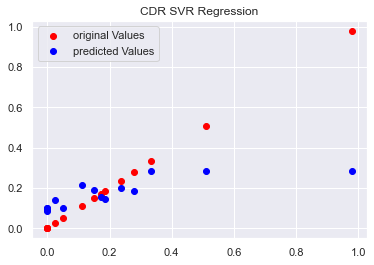

Root Mean Squared Error : 0.20173443378008105
R-Squared Value : 0.35977656641770683


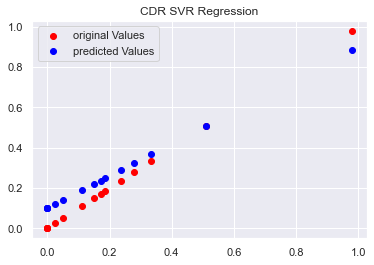

Root Mean Squared Error : 0.07801485430865662
R-Squared Value : 0.9042527955923204


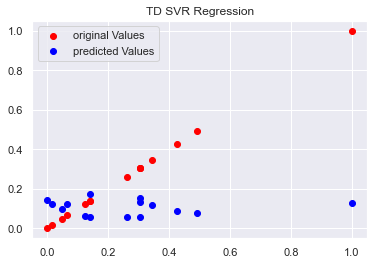

Root Mean Squared Error : 0.2947076060142832
R-Squared Value : -0.44999641994574824


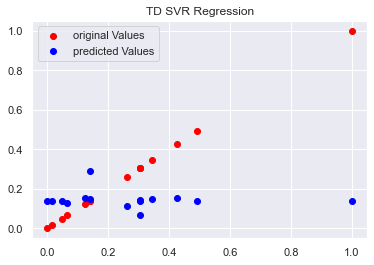

Root Mean Squared Error : 0.28027848539645783
R-Squared Value : -0.311486319519676


In [32]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
svrRegression(X_train_CDR,y_train_CDR,X_test_CDR,y_test_CDR,"CDR SVR Regression")
svrRegression(X_train_TD,y_train_TD,X_test_TD,y_test_TD,"TD SVR Regression")


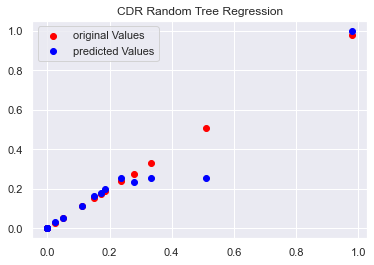

Root Mean Squared Error : 0.06959197674216196
R-Squared Value : 0.9238114261459497


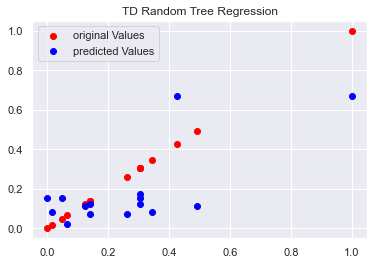

Root Mean Squared Error : 0.18835820645489623
R-Squared Value : 0.4076841779913656


In [33]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(X_train_CDR,y_train_CDR,X_test_CDR,y_test_CDR,"CDR Random Tree Regression")
decisionTreeRegression(X_train_TD,y_train_TD,X_test_TD,y_test_TD,"TD Random Tree Regression")

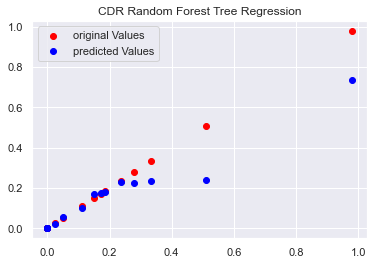

Root Mean Squared Error : 0.09877880760235842
R-Squared Value : 0.8465032949061375


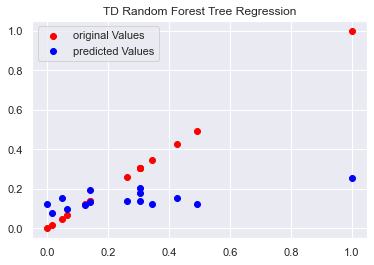

Root Mean Squared Error : 0.24695099506217122
R-Squared Value : -0.01813601852498037


In [34]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

randomDecTreeRegression(X_train_CDR,y_train_CDR,X_test_CDR,y_test_CDR,"CDR Random Forest Tree Regression")
randomDecTreeRegression(X_train_TD,y_train_TD,X_test_TD,y_test_TD,"TD Random Forest Tree Regression")

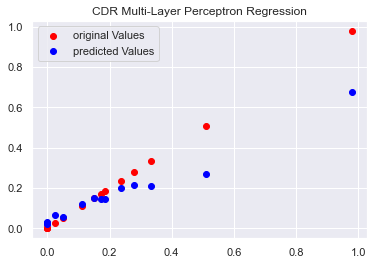

Root Mean Squared Error : 0.10959025889756535
R-Squared Value : 0.8110637006435777


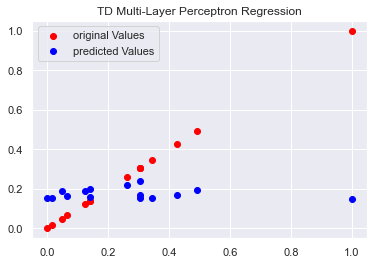

Root Mean Squared Error : 0.26315786990973083
R-Squared Value : -0.1561574064465281


In [35]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )

mlpRegressor(X_train_CDR,y_train_CDR,X_test_CDR,y_test_CDR,"CDR Multi-Layer Perceptron Regression")
mlpRegressor(X_train_TD,y_train_TD,X_test_TD,y_test_TD,"TD Multi-Layer Perceptron Regression")

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [36]:
#split data into train and test data

x = df[df.columns.difference(["Name","TD","CDR"])].values
y_CDR = df["CDR"].values
y_TD = df["TD"].values

X_train_CDR,X_test_CDR,y_train_CDR,y_test_CDR = train_test_split(x,y_CDR,test_size=0.3,train_size=0.7,random_state=random_state_fixed)


X_train_TD,X_test_TD,y_train_TD,y_test_TD = train_test_split(x,y_TD,test_size=0.3,train_size=0.7,random_state=random_state_fixed)

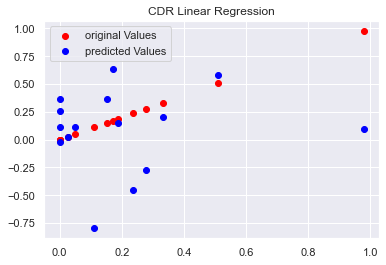

Root Mean Squared Error : 0.4373564766984459
R-Squared Value : -2.0091415912957933


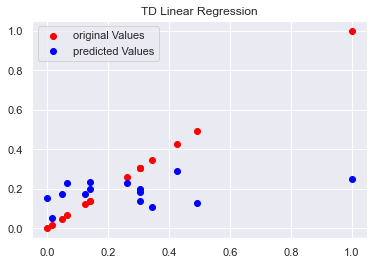

Root Mean Squared Error : 0.2451858519572477
R-Squared Value : -0.003633279100095921


In [37]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )

linearRegression(X_train_CDR,y_train_CDR,X_test_CDR,y_test_CDR,"CDR Linear Regression")
linearRegression(X_train_TD,y_train_TD,X_test_TD,y_test_TD,"TD Linear Regression")

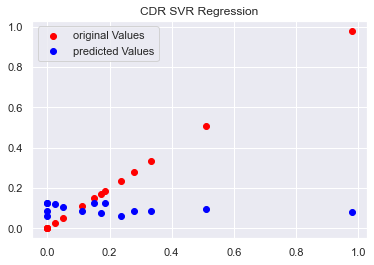

Root Mean Squared Error : 0.2806922153718833
R-Squared Value : -0.2394591996677582


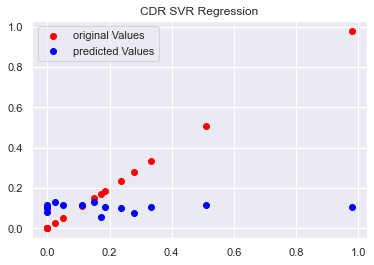

Root Mean Squared Error : 0.27161271934564973
R-Squared Value : -0.16057097814494825


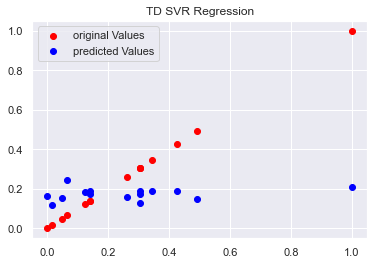

Root Mean Squared Error : 0.25636138138174125
R-Squared Value : -0.09720921648004177


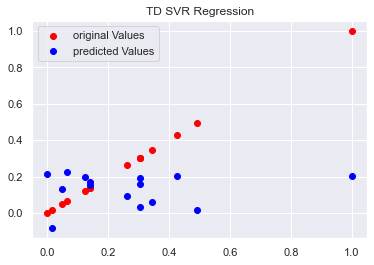

Root Mean Squared Error : 0.28571024254777494
R-Squared Value : -0.3628117224692995


In [38]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )

svrRegression(X_train_CDR,y_train_CDR,X_test_CDR,y_test_CDR,"CDR SVR Regression")
svrRegression(X_train_TD,y_train_TD,X_test_TD,y_test_TD,"TD SVR Regression")

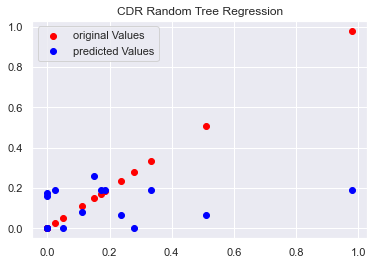

Root Mean Squared Error : 0.26397284924061903
R-Squared Value : -0.09620055857353282


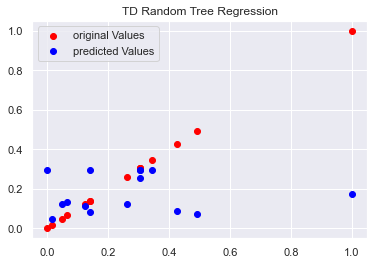

Root Mean Squared Error : 0.2736117467839093
R-Squared Value : -0.24983798119584866


In [39]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )

decisionTreeRegression(X_train_CDR,y_train_CDR,X_test_CDR,y_test_CDR,"CDR Random Tree Regression")
decisionTreeRegression(X_train_TD,y_train_TD,X_test_TD,y_test_TD,"TD Random Tree Regression")

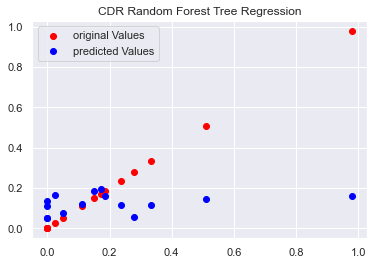

Root Mean Squared Error : 0.25460210542169787
R-Squared Value : -0.019754147390647958


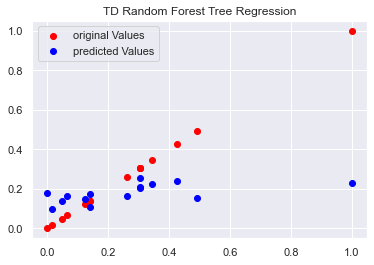

Root Mean Squared Error : 0.23715468160707248
R-Squared Value : 0.061038802257296076


In [40]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )


randomDecTreeRegression(X_train_CDR,y_train_CDR,X_test_CDR,y_test_CDR,"CDR Random Forest Tree Regression")
randomDecTreeRegression(X_train_TD,y_train_TD,X_test_TD,y_test_TD,"TD Random Forest Tree Regression")

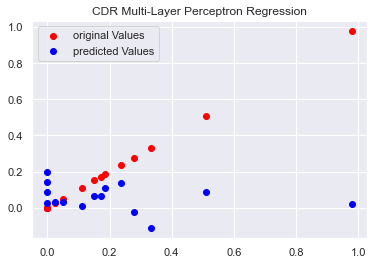

Root Mean Squared Error : 0.316020127902651
R-Squared Value : -0.5710897234284453


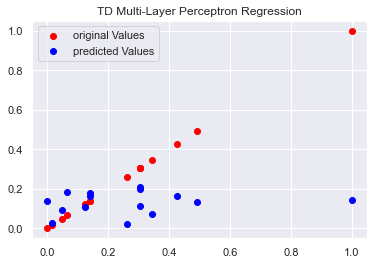

Root Mean Squared Error : 0.27756758023514383
R-Squared Value : -0.28623913583745897


In [41]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )

mlpRegressor(X_train_CDR,y_train_CDR,X_test_CDR,y_test_CDR,"CDR Multi-Layer Perceptron Regression")
mlpRegressor(X_train_TD,y_train_TD,X_test_TD,y_test_TD,"TD Multi-Layer Perceptron Regression")